# ◈ 데이터 분석 준비

## 1) Colab 환경 설정

In [ ]:
# 시각화 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 트리맵
!pip install squarify

# 요인분석
!pip install pingouin factor_analyzer

# 연관분석
!pip install -U apyori mlxtend

## 2) 필수 라이브러리 로드

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from patsy import demo_data, dmatrix, dmatrices

## 3) 글로벌 환경 설정

In [ ]:
#%precision 3 # np 정확도를 소숫점 3자리로 고정
%matplotlib inline
sns.set_theme()

# plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

sns_color = sns.color_palette('pastel')
plt_line = ['-', '--', ':', '-.']

## 4) 분석 데이터 로드

In [ ]:
tips = sns.load_dataset('tips')

df = tips
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


# ◈ Matplotlib

## 1) plot - line

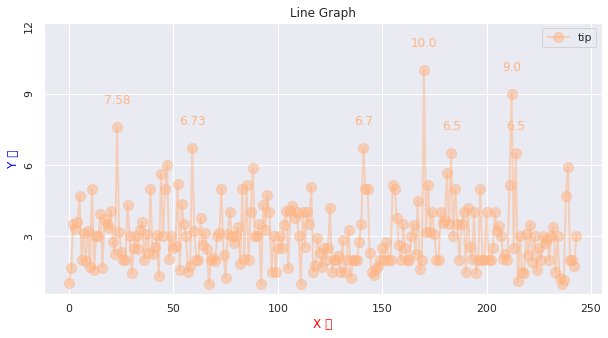

In [ ]:
x = df.index
y = np.array(df.tip)

plt.plot(x, y, #'ro-',
         linewidth=2, 
         alpha = 0.5,
         color=sns_color[1],
        #  linestyle='-', #'-', '--', '-.', ':'
         marker='o', # 'o', 'v', '+', '*', 'x'
         markersize = 10,
         label='tip',
         )

# 데이터 값 표시
for idx, txt in enumerate(y):
  if(txt > 6):
    plt.text(x[idx], y[idx]+1, txt, ha='center', color=sns_color[1])

plt.title('Line Graph')
plt.xlabel('X 축', color='red') # left, center, right
plt.ylabel('Y 축', color='blue') # top, center, bottom
plt.legend(loc='upper right') # 'lower right'

# plt.xticks([0,100,200,300])
plt.yticks([3,6,9,12], rotation=90)

plt.show()

## 2) scatter

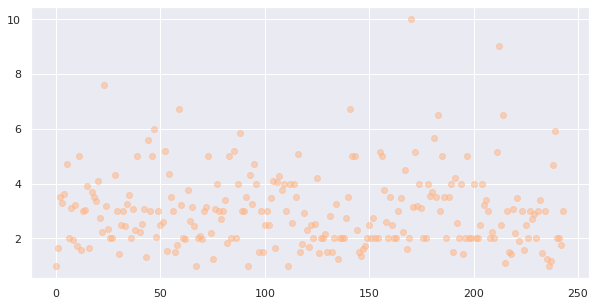

In [ ]:
plt.scatter(df.index, df.tip,
            alpha = 0.5,
            color=sns_color[1],
            );

## 3) bar / barh

> 세로막대그래프

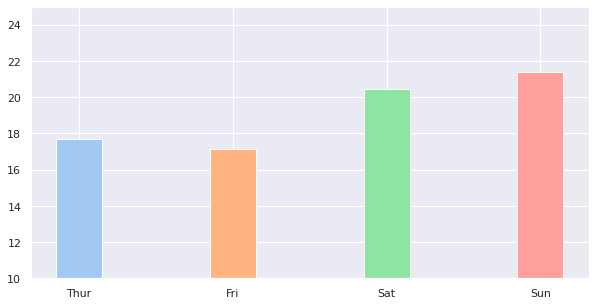

In [ ]:
tmp = df.groupby('day')['total_bill'].mean()
x = list(tmp.index)
y = np.array(tmp)

plt.bar(x, y,
        width = 0.3,
        color = sns_color,
        )

plt.ylim(10, 25);

> 가로막대그래프

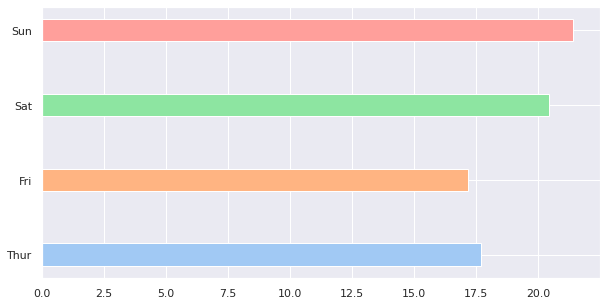

In [ ]:
tmp = df.groupby('day')['total_bill'].mean()
x = list(tmp.index)
y = np.array(tmp)

plt.barh(x, y,
         height = 0.3,
         color = sns_color,
         );

## 4) hist

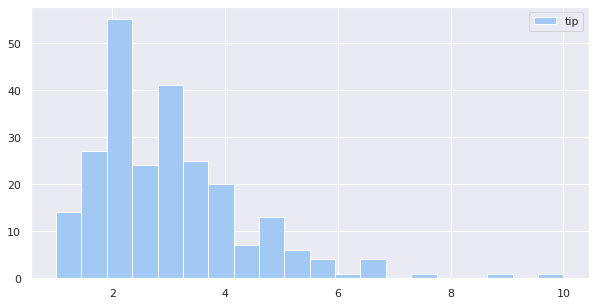

In [ ]:
plt.hist(df.tip,
         bins = 20,
         density = False,
         color = sns_color[0],
         label = 'tip'
         )
plt.legend();

## 5) 멀티 그래프

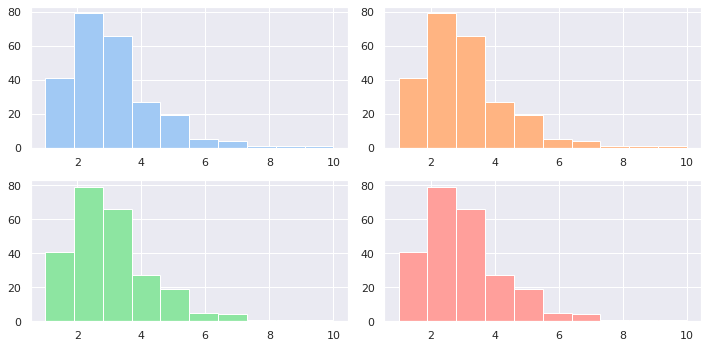

In [ ]:
ax1 = plt.subplot(221)
ax1.hist(df.tip, color=sns_color[0])

ax2 = plt.subplot(222)
ax2.hist(df.tip, color=sns_color[1])

ax3 = plt.subplot(223)
ax3.hist(df.tip, color=sns_color[2])

ax4 = plt.subplot(224)
ax4.hist(df.tip, color=sns_color[3]);

plt.tight_layout();

# ◈ 시각화 그래프

## 1) Basic

### 가) scatterplot

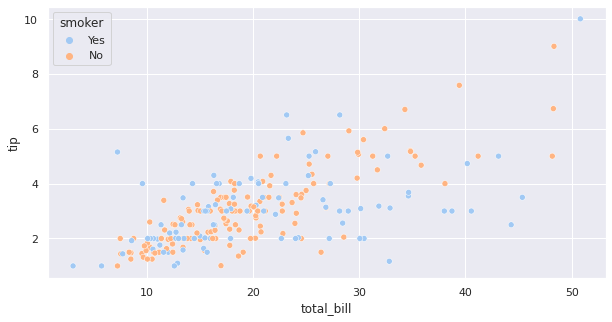

In [ ]:
sns.scatterplot(
    data = df, 
    x = 'total_bill', 
    y = 'tip', 
    hue = 'smoker',   
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    # alpha = 0.7, 
    # color='#bb3f3f', 
    # size = 'species', 
    # style = 'species',
    legend='full', # 범례 : 'auto', 'brief', 'full', False
    );

### 나) lineplot

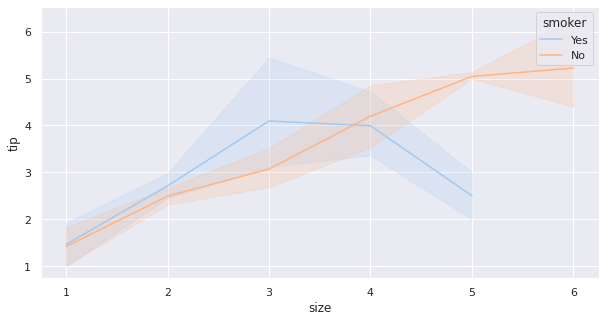

In [ ]:
sns.lineplot(
    data = df,
    x = 'size',
    y = 'tip',
    hue = 'smoker',
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    # alpha = 0.7,
    # color = '#bb3f3f', 
    # size = 'species',
    # style = 'species',
    # legend = False, # 범례 : 'auto', 'brief', 'full', False
    # ci = 50, # Confidence Interval : 'sd', 0~100, None
    );

### 다) barplot

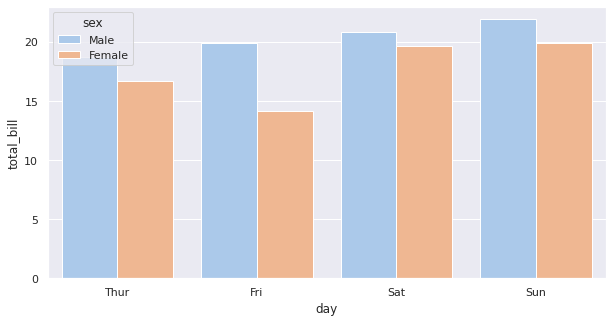

In [ ]:
sns.barplot(
    data = df,
    x = 'day',
    y = 'total_bill',
    hue = 'sex', 
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    # alpha = 0.7,
    # color = '#bb3f3f',
    capsize = .1,
    ci = None, # Confidence Interval : 'sd', 0~100, None
    );

### 라) pie - 백분율

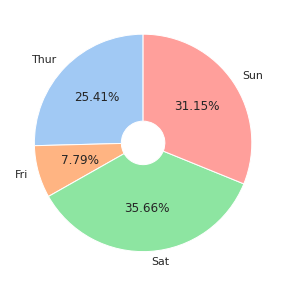

In [ ]:
tmp = df.groupby('day')[['total_bill']].count()

plt.pie(
    x = tmp.total_bill,
    labels = tmp.index,
    colors = sns_color, 
    autopct = '%.2f%%',
    startangle = 90,
    wedgeprops={'width':0.8}, # 도넛그래프
    );

### 마) squarify - 트리맵

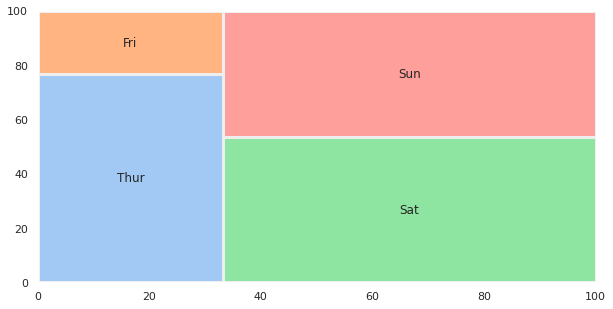

In [ ]:
import squarify
tmp = df.groupby('day')[['total_bill']].count()

squarify.plot(
    tmp.total_bill,
    label = tmp.index,
    color = sns_color,
    bar_kwargs=dict(linewidth=3, edgecolor="#eee")
);

## 2) Explore

### 가) countplot - 갯수

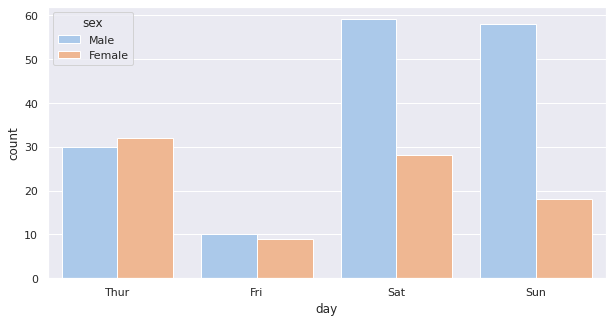

In [ ]:
sns.countplot(
    data = df,
    x = 'day',
    # y = 'species',
    hue = 'sex',
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    # alpha = 0.7,
    # color = '#bb3f3f',
    linewidth = 1,
    );

### 나) histplot - 도수

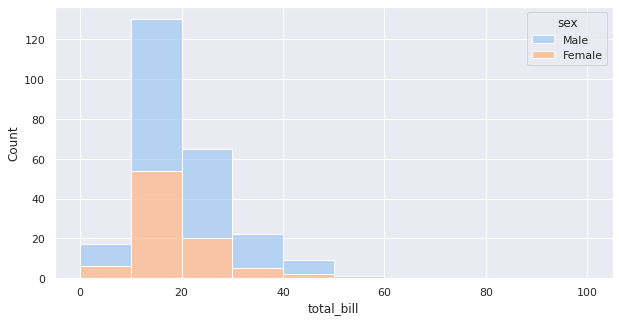

In [ ]:
sns.histplot(
    data = df,
    x = 'total_bill',
    # y = 'Temp',
    hue = 'sex',
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    alpha = 0.7,
    # color = '#bb3f3f',
    # legend = False, # 범례 : 'auto', 'brief', 'full', False
    # linewidth = 2,
    bins = 10,
    binrange = (0, 100),
    # kde = True, # KDE 곡선 표시 여부
    multiple = 'stack', # 적층 : 'layer', 'stack', 'fill', 'dodge'
    stat = 'count', # 통계 : 'count', 'frequency', 'percent', 'density', 'proportion'
    );

### 다) kdeplot - 분포
- 데이터 집합의 관측치 분포를 연속확률 밀도 곡선으로 표현

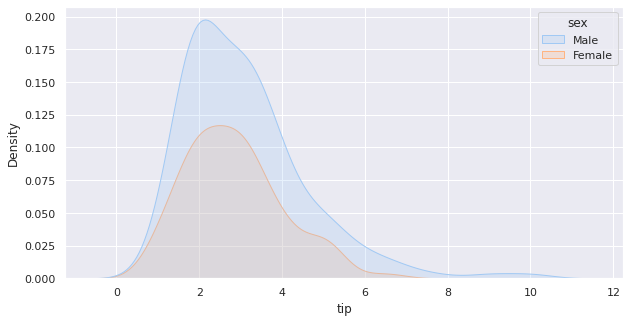

In [ ]:
sns.kdeplot(
    data = df,
    x = 'tip',
    # y = 'mpg', # 수평으로 그리거나 두변수를 표현하고자 하는 경우
    hue = 'sex', 
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    shade = True,
    # alpha = 0.2,
    # color = '#bb3f3f',
    # legend = False, # 범례 : 'auto', 'grief', 'full', False
    # fill = True,
    # bw_adjust = 5, # 곡률 : 숫자가 클수록 부드러워짐
    # multiple = 'stack', # 적층 : 'layer', 'stack', 'fill'
    # cumulative=True, # Cumulative distribution
    );

### 라) Box - 사분위

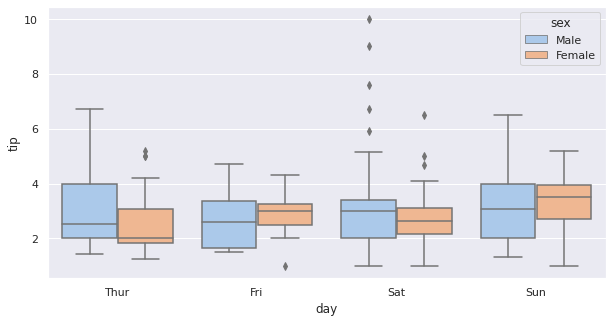

In [ ]:
sns.boxplot(
    data = df, 
    x = 'day', 
    y = 'tip',
    hue = 'sex', 
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    );

### 마) stem - 한계치

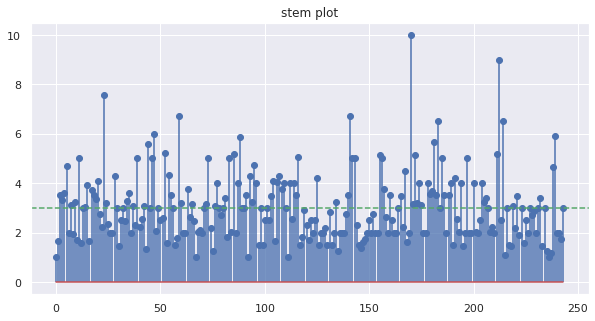

In [ ]:
plt.stem(
    df.tip, 
    use_line_collection=True
    );
plt.axhline(df.tip.mean(), c="g", ls="--")
plt.title("stem plot")
plt.show()

### 바) heatmap - 비교

> seaborn - DataFrame

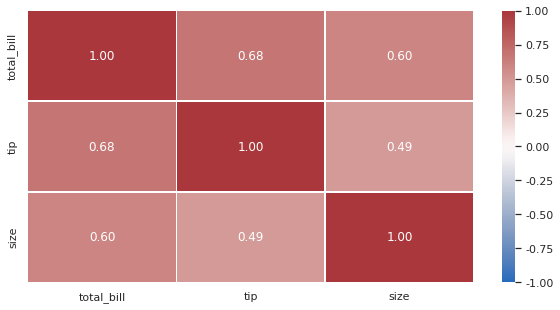

In [ ]:
sns.heatmap(
    data = df.corr(),
    annot = True,
    vmax = 1,
    vmin = -1,
    cmap = 'vlag', # 'RdYlBu_r', 'vlag', 'coolwarm'
    linewidths=.5,
    fmt='.2f',
    );

> matplotlib - X, Y 변수

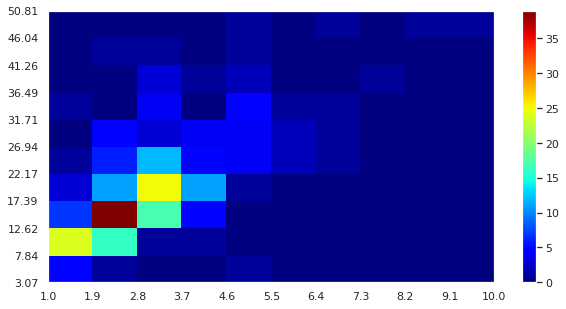

In [ ]:
fig, ax = plt.subplots()
c = plt.hist2d(df.tip, df.total_bill, bins=[10,10], cmap=plt.cm.jet)
ax.set_xticks(c[1])
ax.set_yticks(c[2])
plt.colorbar(c[3])
plt.show()

## 3) Statistic

### 가) pointplot - 신뢰구간
- 점 추정치와 신뢰구간 표현

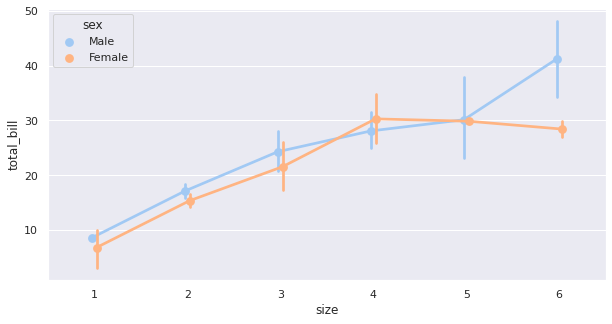

In [ ]:
sns.pointplot(
    data = df,
    x = 'size',
    y = 'total_bill',
    hue = 'sex', 
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    # alpha = 0.7,            
    # color = '#bb3f3f',      
    # capsize = .2, # 상하단 바
    # join = False, # 연결선
    dodge = True, # 그룹간 간격
    # ci = 95, # Confidence Interval : 'sd', 0~100, None
    );

### 나) pairplot - 상관관계
- 데이터셋의 상관관계 표현

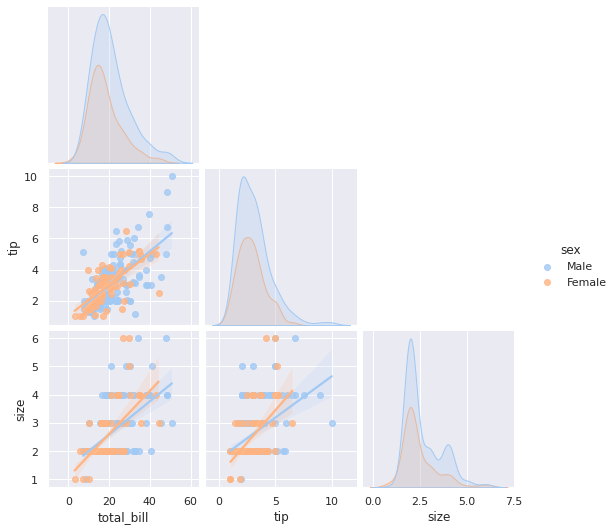

In [ ]:
sns.pairplot(
    data = df,
    hue = 'sex',
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    kind = 'reg', # 상관관계 그래프 : 'scatter', 'kde', 'hist', 'reg'
    diag_kind = 'kde', # 대각선 그래프 : 'auto', 'hist', 'kde', None
    corner = True,
    # height=2 # 그래프 크기
    );

### 다) qqplot - 정규성

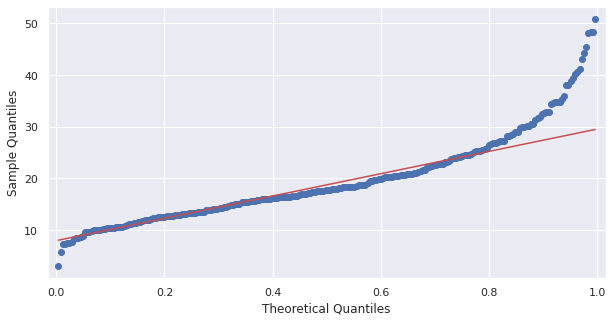

In [ ]:
flg, ax = plt.subplots()
sm.qqplot(
    df.total_bill,
    line='q',
    dist=stats.uniform,
    ax=ax
    )
plt.show()

### 라) tukey - ANOVA 사후검정

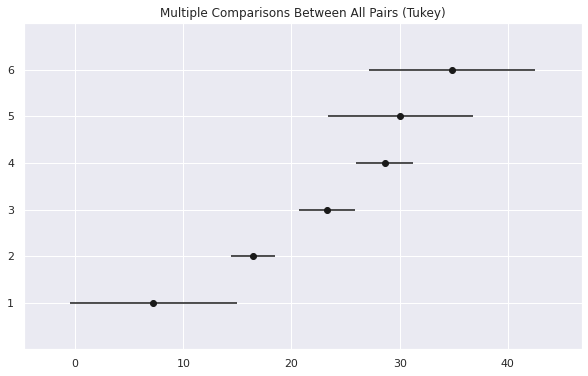

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(
    groups = df['size'],      # Category가 숫자형 데이터로 되어있어야 함
    endog = df['total_bill'], 
    alpha = 0.05)

#각 그룹 평균의 신뢰구간 도식화
posthoc.plot_simultaneous()
plt.show()

## 4) Regresstion

In [ ]:
from statsmodels.formula.api import ols

# 회귀분석 모델 생성
model = ols('tip~total_bill', df).fit()

### 가) regplot - 회귀직선
- 데이터 및 선형회귀모형 적합치를 표현

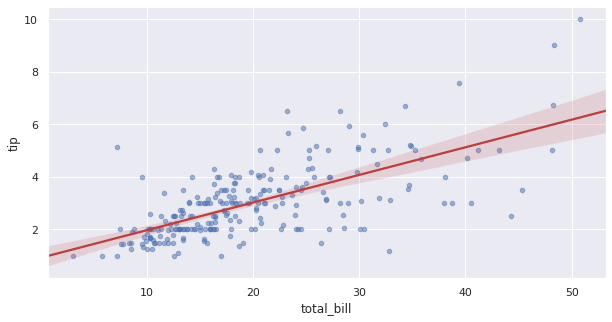

In [ ]:
sns.regplot(
    data = df,
    x = 'total_bill',
    y = 'tip',
    # marker ='*', # 마커 : 'o', '*', '+'
    # color = 'green',
    scatter_kws=dict(alpha=0.5, s=20),
    line_kws=dict(color='#bb3f3f'),
    fit_reg = True,
    truncate = False, # 좌우측 여백 유무
    # x_estimator = np.mean, # X 데이터를 CI로 묶어서 표시
    # ci = None, # Confidence Interval : 'sd', 0~100, None
    );

### 나) jointplot = reg + hist

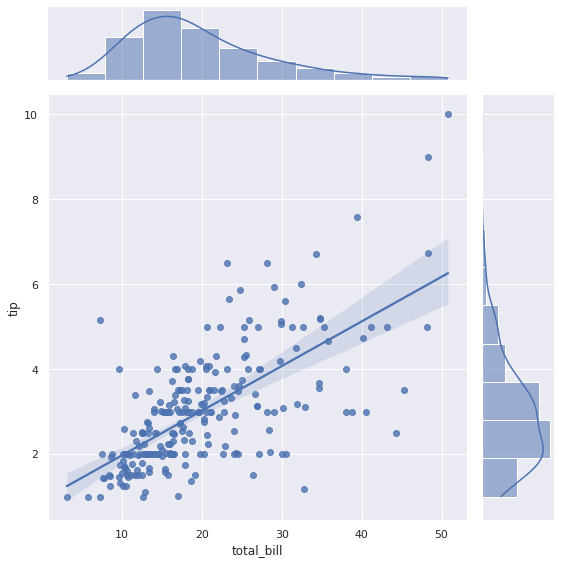

In [ ]:
sns.jointplot(
    data = df,
    x="total_bill", 
    y="tip", 
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    # color = '#bb3f3f',
    marginal_kws=dict(bins=10),
    kind="reg", # 'scatter', 'reg', 'kde', 'hex'
    height = 8,
    );

### 다) residplot - 잔차 분포
- 회귀분석 잔차 등분산성 확인
- x = model.fittedvalues 또는 독립변수
- y = 종속변수

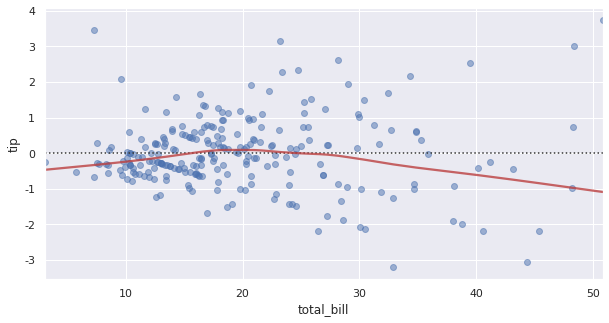

In [ ]:
sns.residplot(
    data = df,
    x = 'total_bill', 
    y = 'tip',
    lowess = True,
    scatter_kws ={'alpha':.5},
    line_kws ={'color':'#bb3f3f', 'alpha':.8},
    );

### 라) Cook's distance - 이상치

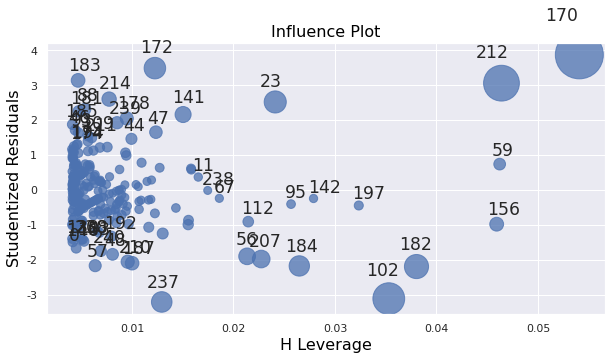

In [ ]:
cooks = model.get_influence().cooks_distance[0]
fig, ax = plt.subplots()
# ax.set_ylim(-6, 6)
sm.graphics.influence_plot(
    model, 
    alpha  = 0.2, 
    criterion="cooks",
    ax = ax, 
    )
plt.show()

## 5) Multi Plot

### 가) relplot - scatter, line 

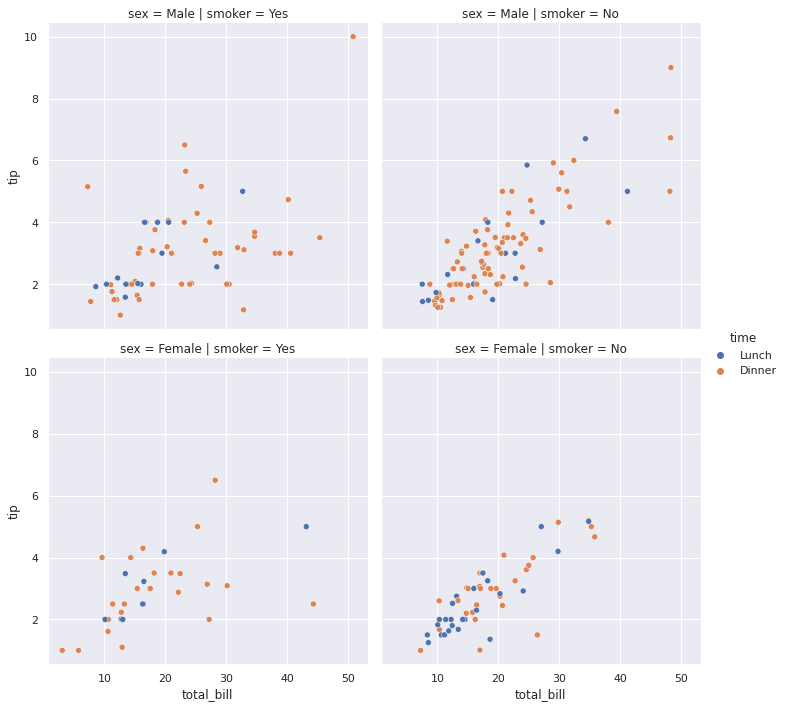

In [ ]:
sns.relplot(
    data=df,
    x = 'total_bill',
    y = 'tip',
    hue = 'time',
    row = 'sex',
    col = 'smoker',
    height = 5,
    kind = 'scatter', # 'line', 'scatter'
);

### 나) distplot - hist, kde

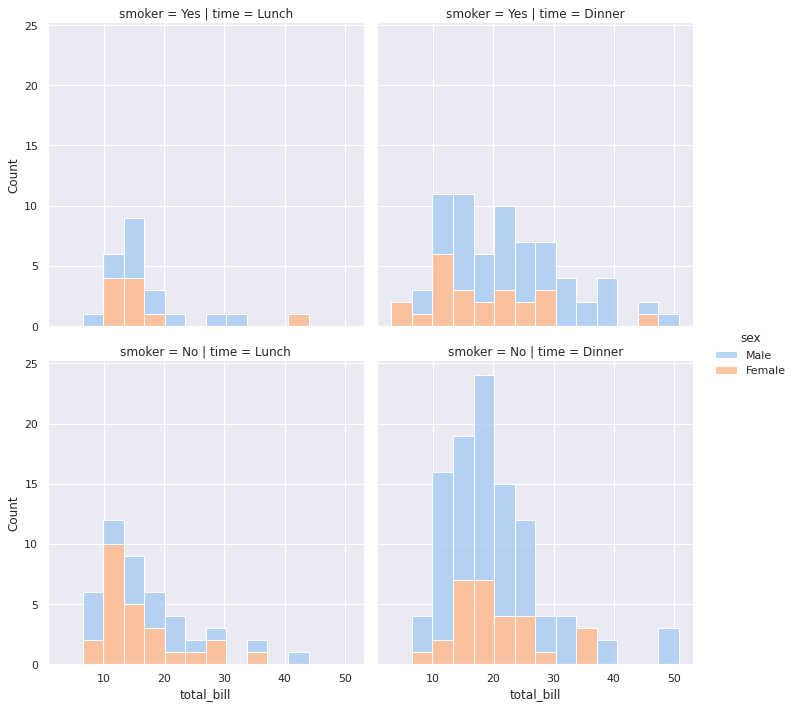

In [ ]:
sns.displot(
    data = df, 
    x = 'total_bill',
    hue = 'sex',
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    row = 'smoker',
    col = 'time', 
    kind = 'hist',  # 'hist', 'kde', 'ecdf'
    height = 5,
    multiple = 'stack', # 적층 : 'layer', 'stack', 'fill', 'dodge'
    # kde = True,
);

### 다) catplot - box, point

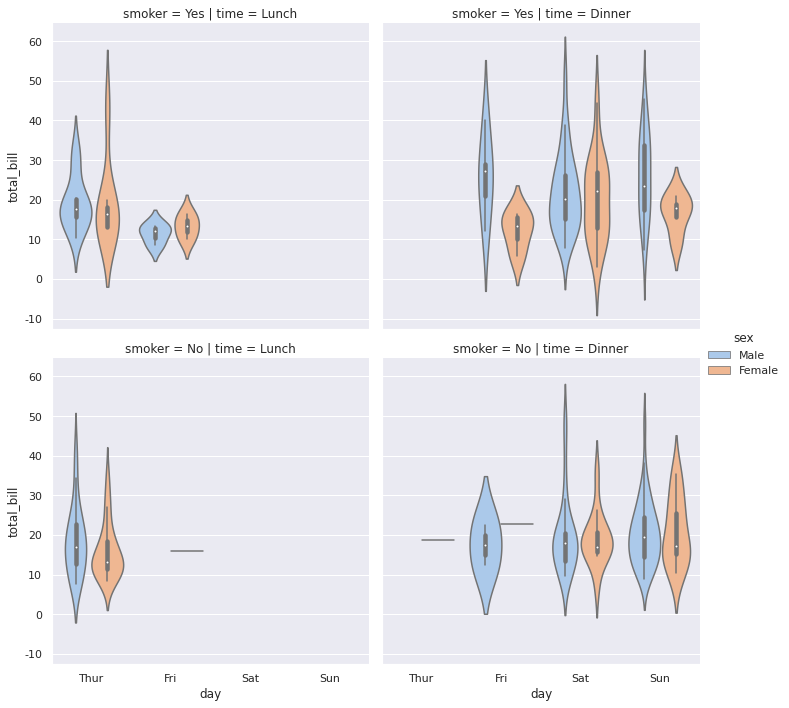

In [ ]:
sns.catplot(
    data = df,
    x = 'day',
    y = 'total_bill',
    hue = 'sex',
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    # alpha = .7,
    row = 'smoker',
    col = 'time',
    kind = 'violin',   # 'box', 'point', 'strip', 'swarm', 'violin'
    height = 5,
);

### 라) lmplot - reg
- regplot과 유사하나 hue, row, col 지정 가능

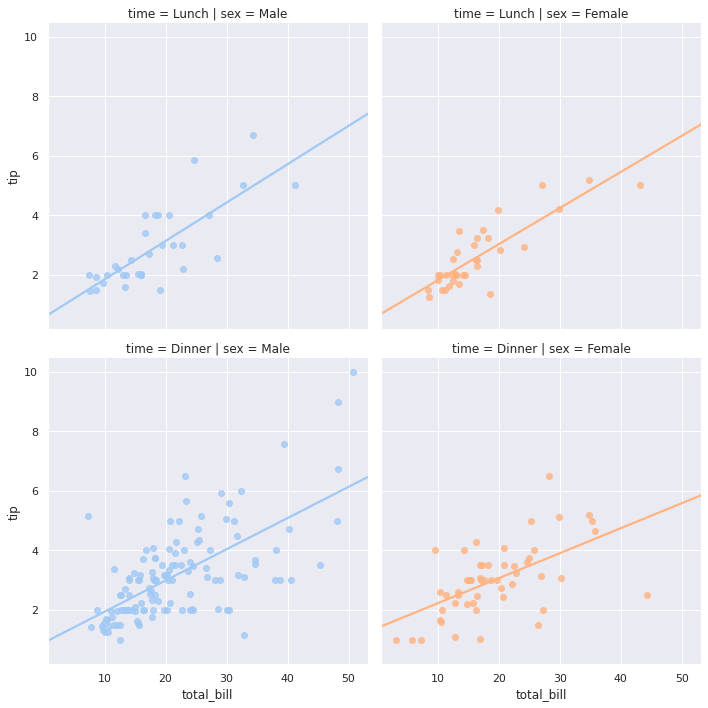

In [ ]:
sns.lmplot(
    data = df,
    x = 'total_bill',
    y = 'tip',
    hue = 'sex',
    palette = 'pastel',  # 'vlag', 'pastel', 'Set2'
    row = "time",
    col = 'sex',
    height = 5,
    markers ='o', # 마커 : 'o', '*', '+'
    truncate = False, # 좌우측 여백 유무
    # x_estimator = np.mean, # X 데이터를 CI로 묶어서 표시
    ci = None, # Confidence Interval : 'sd', 0~100, None
);

## 6) 기타

### 가) 결측치 확인

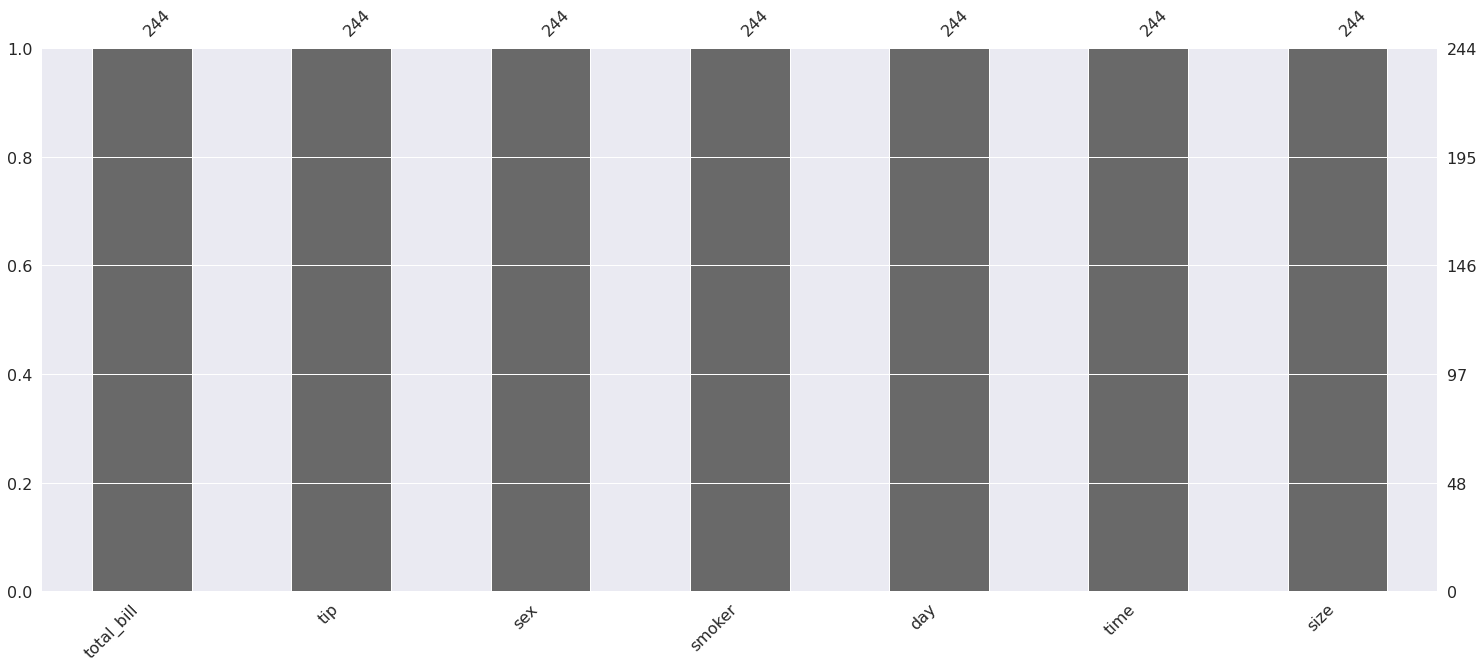

In [ ]:
msno.bar(df);

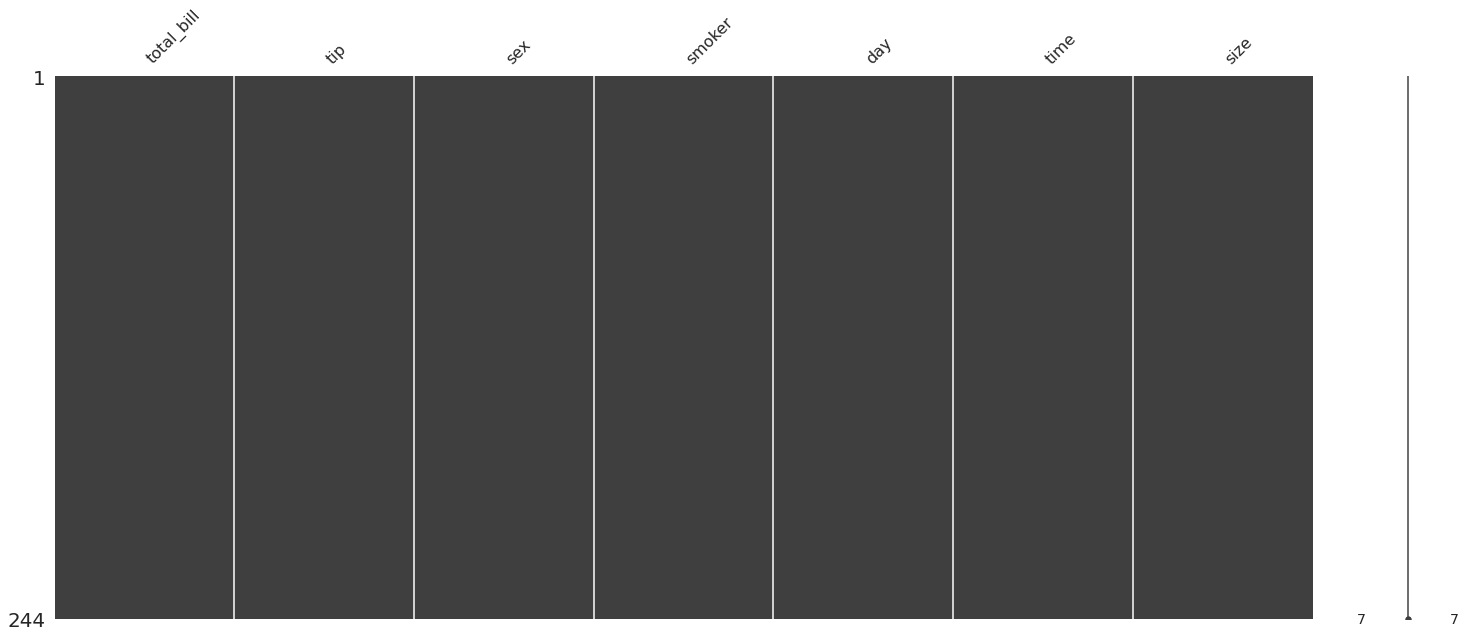

In [ ]:
msno.matrix(df);

### 나) 워드클라우드

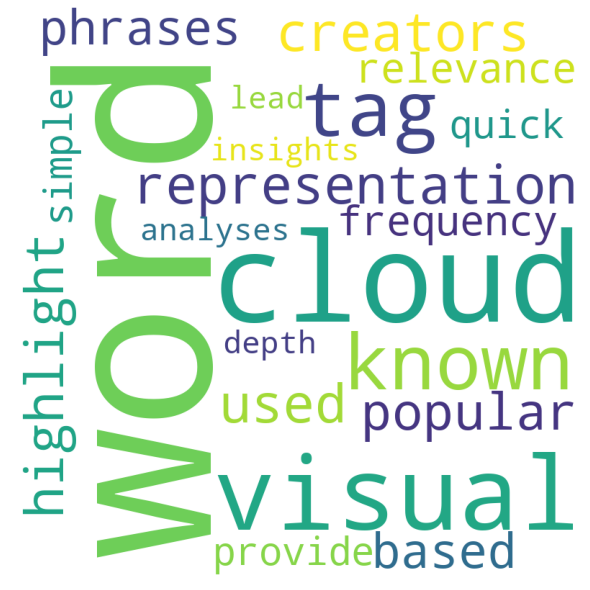

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

comment_words = """
 A word cloud (also known as a tag cloud) is a visual 
representation of words. Cloud creators are used to 
highlight popular words and phrases based on frequency 
and relevance. They provide you with quick and 
simple visual insights that can lead to more 
in-depth analyses.
"""
stopwords = set(STOPWORDS)
# print(stopwords)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()